# 500_RQ1_Analysis 
## Purpose 
In this notebook we read both our Fantasty and FIFA cleaned datasets and join them and performing any necessary cleaning.  
## Datasets 
* Input: FIFA18.csv,Fantasy1718.csv
* Output: Joined1718.csv

In [1335]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
%matplotlib inline

In [1336]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [1337]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [1338]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,False,False,False,42.00,8.255952,32.0,7.375000
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,False,False,False,41.25,7.018182,28.0,6.535714
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,False,False,False,40.00,6.050000,28.0,6.785714


In [1339]:
RQ1[RQ1["fan's_favourite_trait"]==True]

,Players,Position,club,league,age,nationality,overall,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form


In [1340]:
RQ1.groupby(['overall']).count()['Players']

overall
62      1
63      3
64      6
65      9
66      8
67     17
68     28
69     42
70     73
71     97
72    137
73    146
74    151
75    157
76    141
77    164
78    101
79    107
80     96
81     61
82     83
83     52
84     28
85     22
86     18
87     10
88     14
89      8
90      5
91      1
92      3
93      1
94      1
Name: Players, dtype: int64

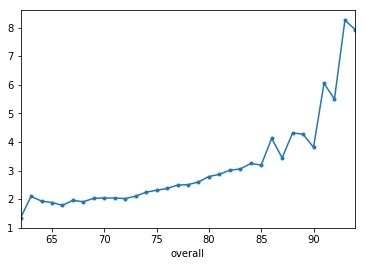

In [1341]:
o = RQ1.groupby(['overall']).mean()['Previous Average Form']
o.plot(style='.-')

In [1342]:
RQ1['Previous Average Form'].corr(RQ1['overall'])

0.61854072490897671

## Goalkeepers

In [1343]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [1344]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

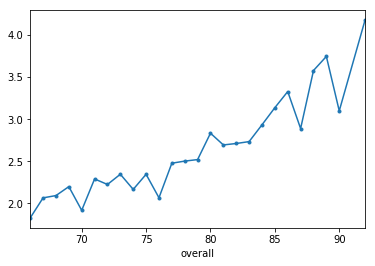

In [1345]:
gk = RQ1_Goalkeepers.groupby(['overall']).mean()['Previous Average Form']
gk.plot(style='.-')

In [1346]:
RQ1_Goalkeepers['Previous Average Form'].corr(RQ1_Goalkeepers['overall'])

0.68849995414859944

In [1347]:
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]

In [1348]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1349]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1350]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [1351]:
underrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

overrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [1352]:
underrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underrated_average_gk['overall'].values[:,np.newaxis])
underrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underrated_worldclass_gk['overall'].values[:,np.newaxis])

overrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overrated_average_gk['overall'].values[:,np.newaxis])
overrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overrated_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [1353]:
underrated_goalkeepers = pd.concat([underrated_average_gk ,underrated_worldclass_gk ],axis=0)

overrated_goalkeepers = pd.concat([overrated_average_gk ,overrated_worldclass_gk ],axis=0)

In [1354]:
t1 = underrated_average_gk['overall'].values[:,np.newaxis] 
t2 = underrated_average_gk['Previous Average Form'].values 
t3 = overrated_average_gk['overall'].values[:,np.newaxis] 
t4 = overrated_average_gk['Previous Average Form'].values 
s1 = underrated_worldclass_gk['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_gk['Previous Average Form'].values 
s3 = overrated_worldclass_gk['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_gk['Previous Average Form'].values

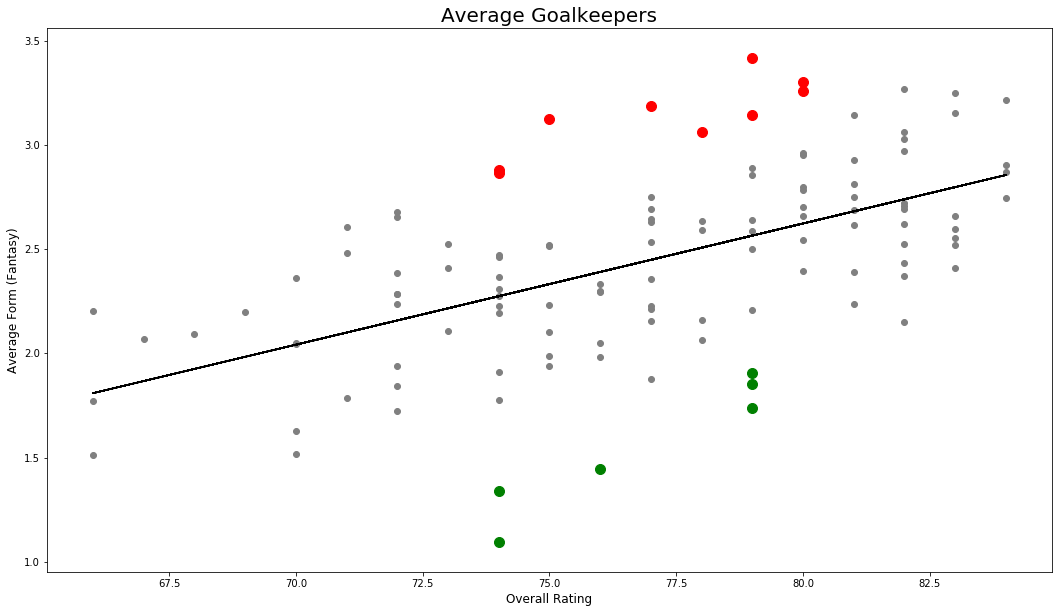

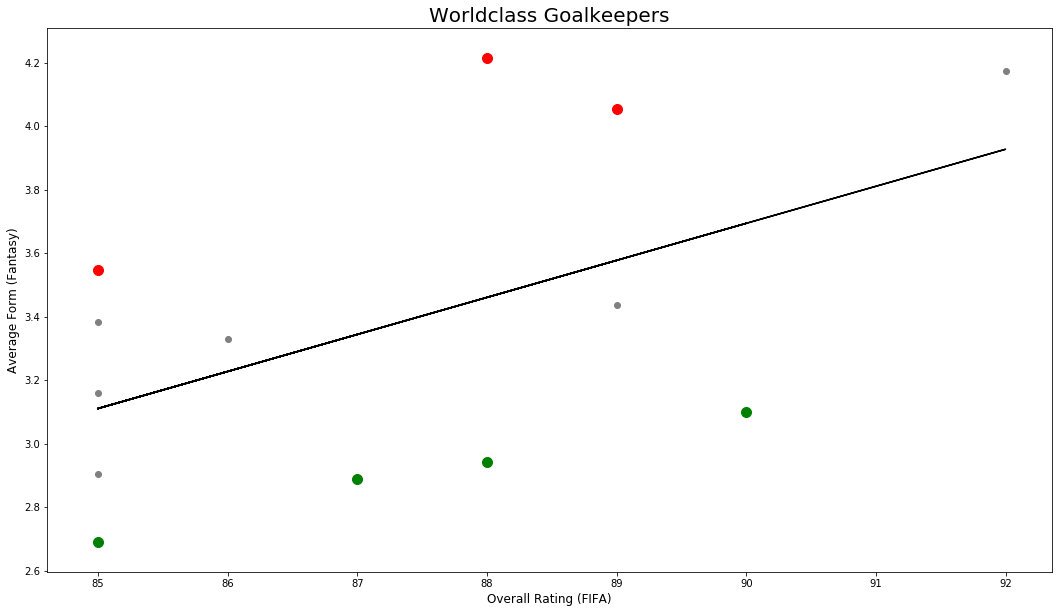

In [1355]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.title('Average Goalkeepers', fontsize=20)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.title('Worldclass Goalkeepers', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Defenders

In [1356]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [1357]:
RQ1_Defenders.groupby(['overall']).count()['Players']

overall
64     2
65     2
66     2
67     4
68    15
69    13
70    25
71    41
72    48
73    49
74    46
75    54
76    52
77    57
78    21
79    40
80    24
81    17
82    14
83    13
84     8
85     6
86     5
88     5
89     1
90     1
Name: Players, dtype: int64

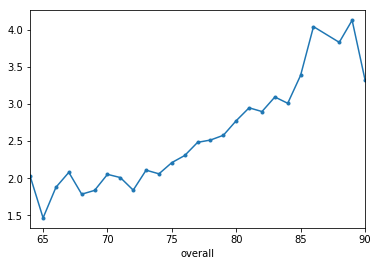

In [1358]:
df = RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form']
df.plot(style='.-')

In [1359]:
RQ1_Defenders['Previous Average Form'].corr(RQ1_Defenders['overall'])

0.62626550414557913

In [1360]:
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]

In [1361]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1362]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1363]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [1364]:
underrated_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

overrated_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [1365]:
underrated_average_def['Predicted Form'] = average_defenders_model.predict(underrated_average_def['overall'].values[:,np.newaxis])
underrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underrated_worldclass_def['overall'].values[:,np.newaxis])

overrated_average_def['Predicted Form'] = average_defenders_model.predict(overrated_average_def['overall'].values[:,np.newaxis])
overrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overrated_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [1366]:
underrated_defenders = pd.concat([underrated_average_def ,underrated_worldclass_def ],axis=0)

overrated_defenders = pd.concat([overrated_average_def ,overrated_worldclass_def ],axis=0)

In [1367]:
t1 = underrated_average_def['overall'].values[:,np.newaxis] 
t2 = underrated_average_def['Previous Average Form'].values 
t3 = overrated_average_def['overall'].values[:,np.newaxis] 
t4 = overrated_average_def['Previous Average Form'].values 
s1 = underrated_worldclass_def['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_def['Previous Average Form'].values 
s3 = overrated_worldclass_def['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_def['Previous Average Form'].values

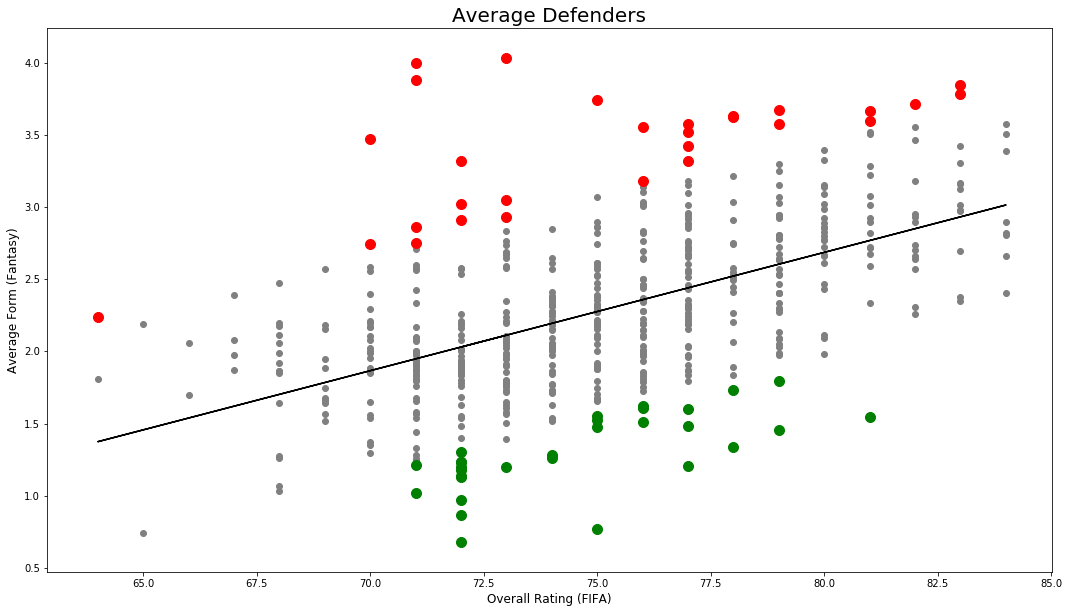

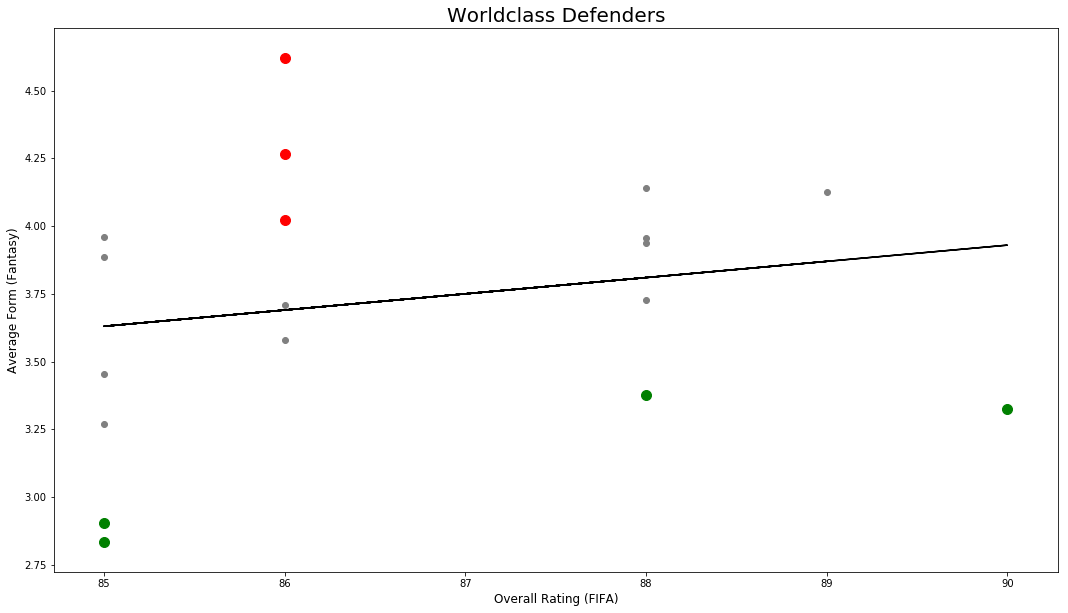

In [1368]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.title('Average Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.title('Worldclass Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Midfielders

In [1369]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [1370]:
RQ1_Midfielders.groupby(['overall']).count()['Players']

overall
62     1
63     3
64     2
65     6
66     3
67     9
68     7
69    17
70    32
71    34
72    48
73    75
74    60
75    62
76    53
77    66
78    55
79    39
80    39
81    22
82    38
83    25
84    13
85     9
86     7
87     8
88     3
89     3
90     2
Name: Players, dtype: int64

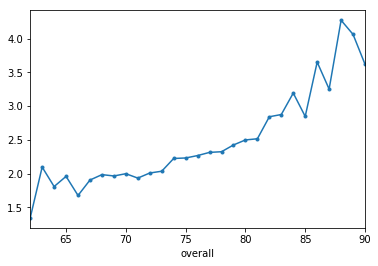

In [1371]:
mid = RQ1_Midfielders.groupby(['overall']).mean()['Previous Average Form']
mid.plot(style='.-')

In [1372]:
RQ1_Midfielders['Previous Average Form'].corr(RQ1_Midfielders['overall'])

0.56668684897250909

In [1373]:
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]

In [1374]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1375]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1376]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [1377]:
underrated_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

overrated_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [1378]:
underrated_average_mid['Predicted Form'] = average_midfielders_model.predict(underrated_average_mid['overall'].values[:,np.newaxis])
underrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underrated_worldclass_mid['overall'].values[:,np.newaxis])

overrated_average_mid['Predicted Form'] = average_midfielders_model.predict(overrated_average_mid['overall'].values[:,np.newaxis])
overrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overrated_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [1379]:
underrated_midfielders = pd.concat([underrated_average_mid ,underrated_worldclass_mid ],axis=0)

overrated_midfielders = pd.concat([overrated_average_mid ,overrated_worldclass_mid ],axis=0)

In [1380]:
t1 = underrated_average_mid['overall'].values[:,np.newaxis] 
t2 = underrated_average_mid['Previous Average Form'].values 
t3 = overrated_average_mid['overall'].values[:,np.newaxis] 
t4 = overrated_average_mid['Previous Average Form'].values 
s1 = underrated_worldclass_mid['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_mid['Previous Average Form'].values 
s3 = overrated_worldclass_mid['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_mid['Previous Average Form'].values

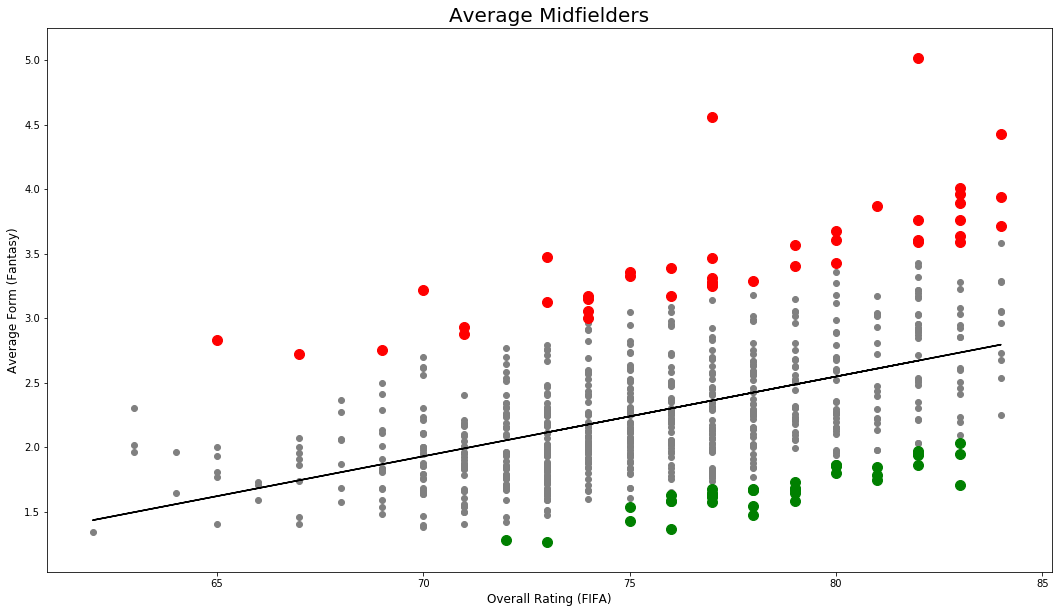

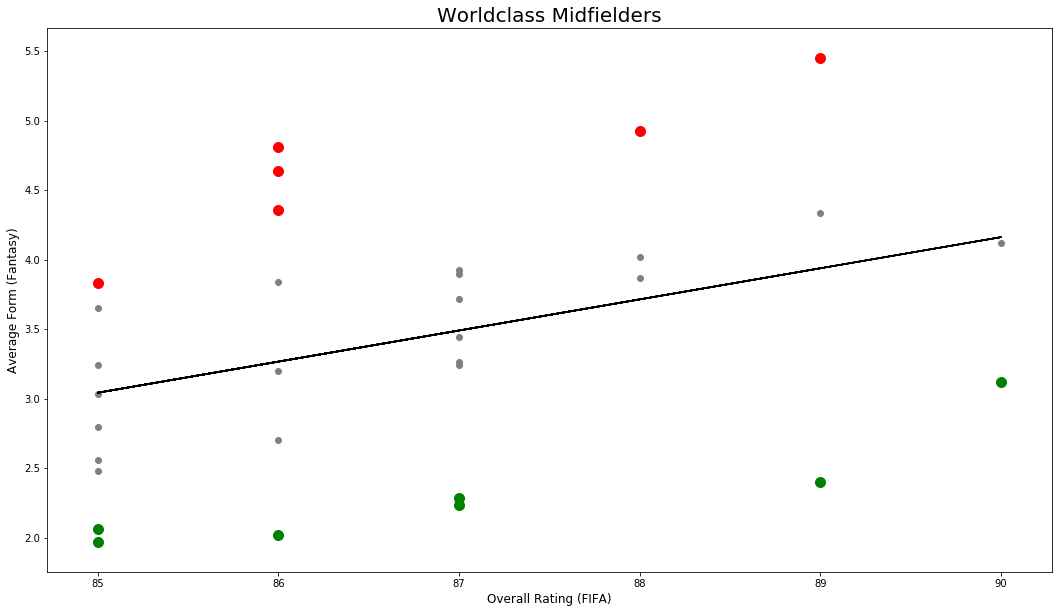

In [1381]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.title('Average Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.title('Worldclass Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Forwards

In [1382]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [1383]:
RQ1_Forwards.groupby(['overall']).count()['Players']

overall
64     2
65     1
67     3
68     5
69    11
70    11
71    19
72    32
73    19
74    32
75    34
76    30
77    30
78    20
79    17
80    23
81    14
82    19
83     7
84     3
85     2
86     5
87     1
88     4
89     2
90     1
91     1
92     2
93     1
94     1
Name: Players, dtype: int64

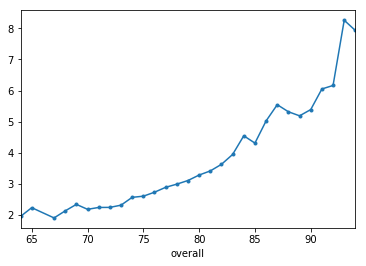

In [1384]:
fwd = RQ1_Forwards.groupby(['overall']).mean()['Previous Average Form']
fwd.plot(style='.-')

In [1385]:
RQ1_Forwards['Previous Average Form'].corr(RQ1_Forwards['overall'])

0.7831046835390989

In [1386]:
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]

In [1387]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1388]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1389]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [1390]:
underrated_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

overrated_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [1391]:
underrated_average_fwd['Predicted Form'] = average_forwards_model.predict(underrated_average_fwd['overall'].values[:,np.newaxis])
underrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underrated_worldclass_fwd['overall'].values[:,np.newaxis])

overrated_average_fwd['Predicted Form'] = average_forwards_model.predict(overrated_average_fwd['overall'].values[:,np.newaxis])
overrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overrated_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [1392]:
underrated_forwards = pd.concat([underrated_average_fwd ,underrated_worldclass_fwd ],axis=0)

overrated_forwards = pd.concat([overrated_average_fwd ,overrated_worldclass_fwd ],axis=0)

In [1393]:
t1 = underrated_average_fwd['overall'].values[:,np.newaxis] 
t2 = underrated_average_fwd['Previous Average Form'].values 
t3 = overrated_average_fwd['overall'].values[:,np.newaxis] 
t4 = overrated_average_fwd['Previous Average Form'].values 
s1 = underrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_fwd['Previous Average Form'].values 
s3 = overrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_fwd['Previous Average Form'].values

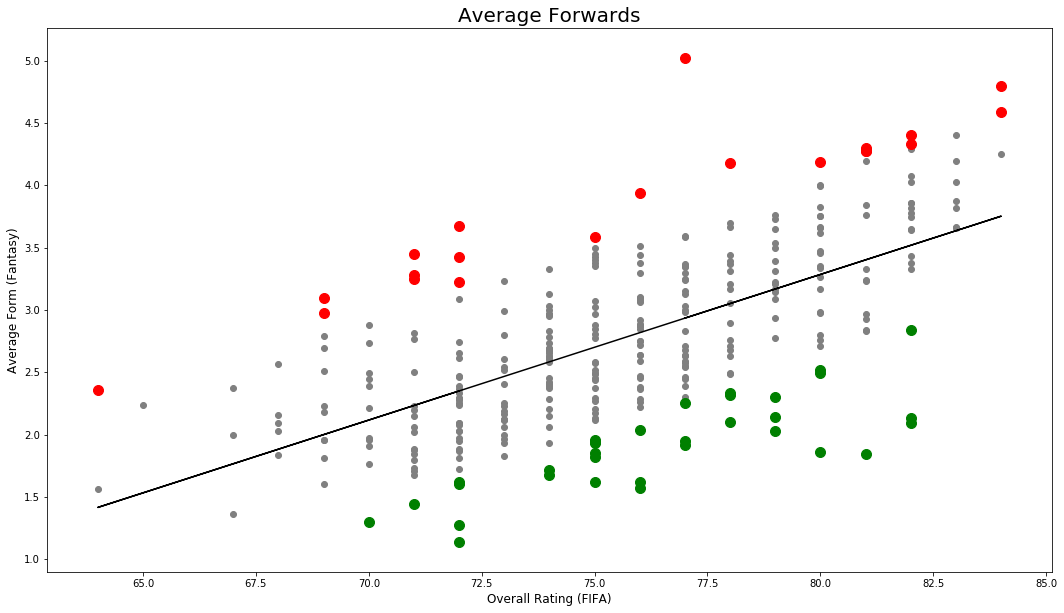

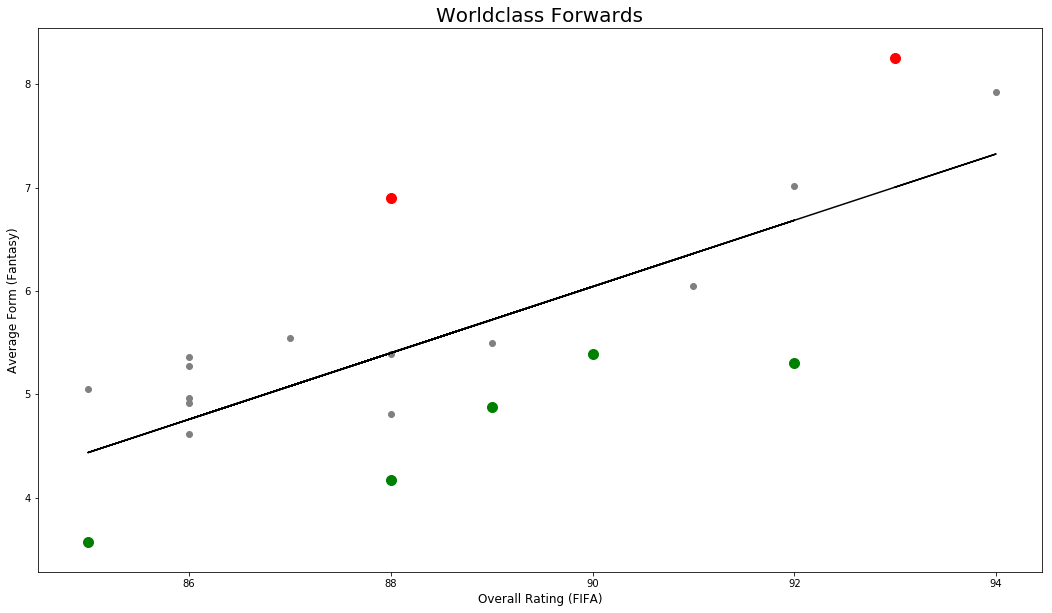

In [1394]:
plt.figure(figsize=(18,10))
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('Average Forwards', fontsize=20)
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('Worldclass Forwards', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()


## Which is more accurate at predicting real-life form: Underrated Players

In [1395]:
underrated_players = pd.concat([underrated_goalkeepers,underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index().drop('index',1)

In [1396]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]

In [1397]:
underrated_players['FIFA Rating'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form'])
underrated_players['Previous Average Form'] = abs(underrated_players['Current Average Form'] - underrated_players['Previous Average Form'])

In [1398]:
underrated_players.loc[underrated_players['FIFA Rating']<underrated_players['Previous Average Form'],'Verdict'] = 'FIFA Rating'
underrated_players.loc[underrated_players['FIFA Rating']>underrated_players['Previous Average Form'],'Verdict'] = 'Previous Average Form'
underrated_players.loc[underrated_players['FIFA Rating'] == underrated_players['Previous Average Form'],'Verdict'] = 'Equal'

In [1399]:
x = underrated_players.Verdict.value_counts()
x = x.transpose()
x.columns = ['Pevious Average Form', 'FIFA Rating','Equal']
x = x.transpose()

Text(0.5,1,'Underrated Verdict')

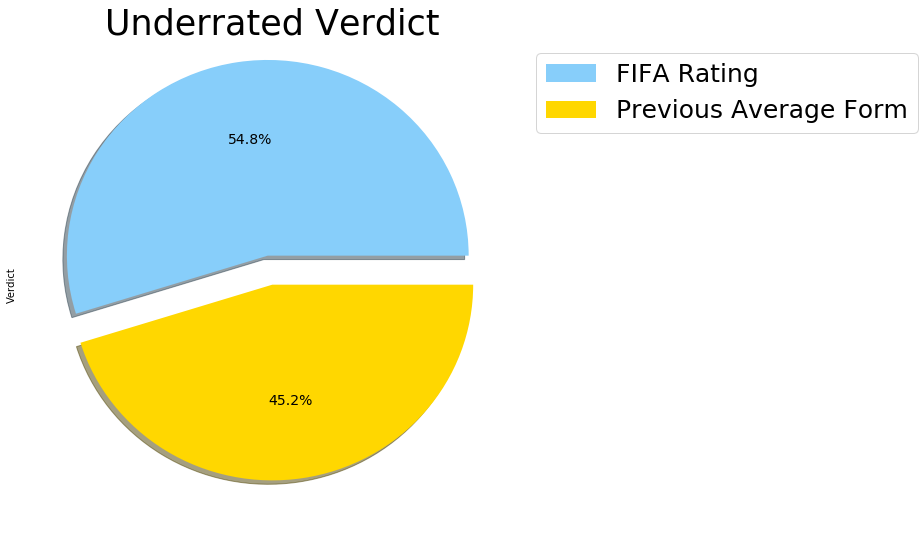

In [1400]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightskyblue','gold'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Underrated Verdict',fontsize=35,color='Black')

In [1401]:
underrated_players = underrated_players[underrated_players['Verdict']=='Previous Average Form']
underrated_players = underrated_players.sort_values('Distance', ascending=False).reset_index().drop('index',1)

In [1402]:
underrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating,Verdict
0,Dele Alli,Midfielder,Tottenham Hotspur,English Premier League,21,England,84,False,False,True,35.000000,0.364055,31.0,4.064516,1.632306,2.796266,1.268250,Previous Average Form
1,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,True,False,True,31.000000,0.068548,8.0,4.875000,1.540520,3.265931,1.609069,Previous Average Form
2,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,False,False,True,21.000000,0.002506,19.0,3.473684,1.359537,2.116653,1.357031,Previous Average Form
3,Dimitri Payet,Midfielder,Olympique de Marseille,French Ligue 1,30,France,83,False,False,True,43.250000,0.212677,29.0,3.793103,1.271298,2.734483,1.058621,Previous Average Form
4,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,False,False,False,41.250000,0.756150,34.0,4.647059,1.156426,2.734483,1.912576,Previous Average Form
5,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,False,False,False,31.333333,0.434200,27.0,4.370370,1.139904,2.796266,1.574105,Previous Average Form
6,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,False,False,False,8.666667,0.798077,24.0,4.375000,1.136721,2.440202,1.934798,Previous Average Form
7,Nabil Fekir,Midfielder,Olympique Lyonnais,French Ligue 1,23,France,82,False,False,True,21.250000,1.735294,26.0,5.500000,1.092006,2.672700,2.827300,Previous Average Form
8,James Rodriguez,Midfielder,FC Bayern Munich,German Bundesliga,25,Colombia,86,False,False,False,28.000000,0.071429,21.0,4.428571,1.091212,3.265931,1.162640,Previous Average Form
9,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,False,False,False,38.750000,1.673118,30.0,6.466667,1.041475,3.752074,2.714593,Previous Average Form


## Which is more accurate at predicting real-life form: Overerrated Players

In [1403]:
overrated_players = pd.concat([overrated_goalkeepers,overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index().drop('index',1)

In [1404]:
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [1405]:
overrated_players['FIFA Rating'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form'])
overrated_players['Previous Average Form'] = abs(overrated_players['Current Average Form'] - overrated_players['Previous Average Form'])

In [1406]:
overrated_players.loc[overrated_players['FIFA Rating']<overrated_players['Previous Average Form'],'Verdict'] = 'FIFA Rating'
overrated_players.loc[overrated_players['FIFA Rating']>overrated_players['Previous Average Form'],'Verdict'] = 'Previous Average Form'
overrated_players.loc[overrated_players['FIFA Rating'] == overrated_players['Previous Average Form'],'Verdict'] = 'Equal'

In [1407]:
y = overrated_players.Verdict.value_counts()
y = y.transpose()
y.columns = ['Pevious Average Form', 'FIFA Rating','Equal']
y = y.transpose()

Text(0.5,1,'Overrated Verdict')

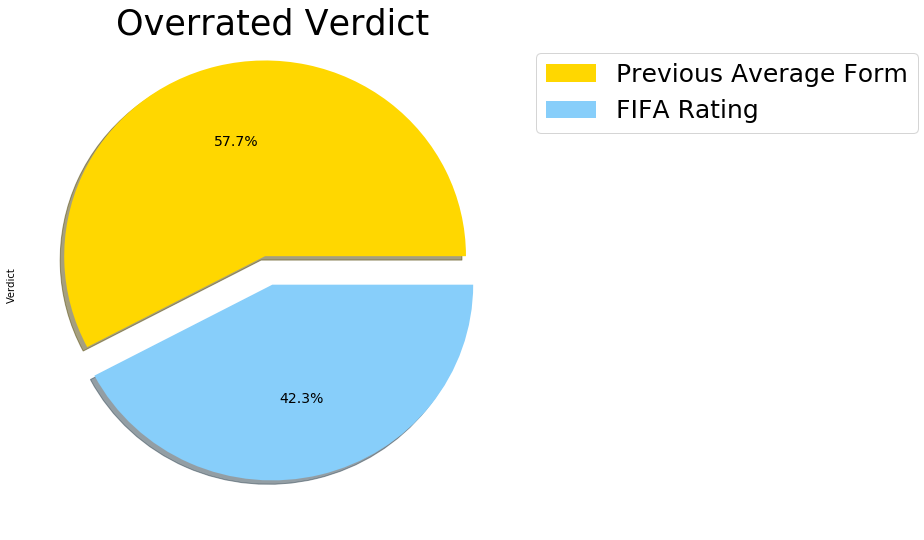

In [1408]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['gold','lightskyblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overrated Verdict',fontsize=35,color='Black')

In [1409]:
overrated_players = overrated_players[overrated_players['Verdict']=='Previous Average Form']
overrated_players = overrated_players.sort_values('Distance', ascending=True).reset_index().drop('index',1)

In [1410]:
overrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating,Verdict
0,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,False,False,False,35.000000,0.208696,23.0,2.608696,-1.537332,3.937332,1.328636,Previous Average Form
1,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25,Spain,82,False,False,True,34.250000,0.071776,30.0,2.166667,-1.423461,3.518352,1.351685,Previous Average Form
2,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24,Italy,87,False,False,False,33.500000,0.322252,22.0,1.909091,-1.258388,3.489731,1.580641,Previous Average Form
3,Sergio Busquets,Midfielder,FC Barcelona,Spanish Primera Division,28,Spain,86,False,False,True,41.000000,0.221707,25.0,2.240000,-1.247639,3.265931,1.025931,Previous Average Form
4,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,False,False,False,36.333333,0.117737,30.0,2.166667,-1.205328,3.489731,1.323065,Previous Average Form
5,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,False,False,False,28.000000,0.060714,20.0,1.400000,-1.182865,2.522151,1.122151,Previous Average Form
6,Arkadiusz Milik,Forward,Napoli,Italian Serie A,23,Poland,79,True,False,False,20.500000,0.521064,11.0,2.545455,-1.143379,3.167769,0.622314,Previous Average Form
7,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26,Spain,72,False,False,True,9.666667,0.275862,6.0,1.000000,-1.073880,2.349742,1.349742,Previous Average Form
8,Toni Kroos,Midfielder,Real Madrid CF,Spanish Primera Division,27,Germany,90,False,False,False,37.500000,0.401739,23.0,3.521739,-1.041132,4.161132,0.639393,Previous Average Form
9,John Guidetti,Forward,RC Celta de Vigo,Spanish Primera Division,25,Sweden,79,False,False,False,21.333333,0.132102,22.0,2.272727,-1.027144,3.167769,0.895041,Previous Average Form


## Reasons for players being over/underrated 

In [1411]:
RQ1.mean()['age'],underrated_players.mean()['age'],overrated_players.mean()['age']

(27.914014517029592, 26.575757575757574, 25.888888888888889)

In [1412]:
RQ1.mean()['Average Apps/Season'],underrated_players.mean()['Average Apps/Season'],overrated_players.mean()['Average Apps/Season']

(29.028941001302815, 28.065656565656568, 30.527777777777779)

In [1413]:
RQ1.mean()['Apps This Season'],underrated_players.mean()['Apps This Season'],overrated_players.mean()['Apps This Season']

(13.880513679508654, 23.515151515151516, 20.955555555555556)

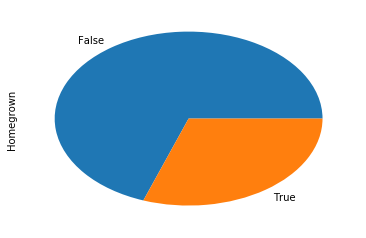

In [1414]:
RQ1['Homegrown'].value_counts().plot(kind='pie')

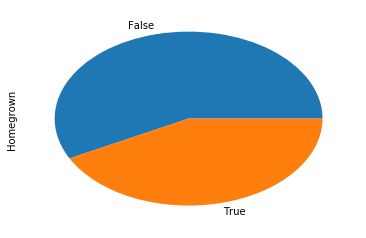

In [1415]:
underrated_players['Homegrown'].value_counts().plot(kind='pie')

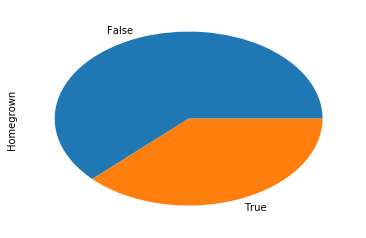

In [1416]:
overrated_players['Homegrown'].value_counts().plot(kind='pie')

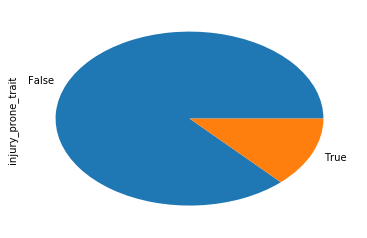

In [1417]:
RQ1['injury_prone_trait'].value_counts().plot(kind='pie')

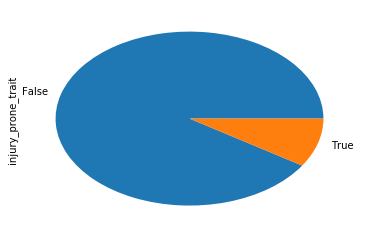

In [1418]:
underrated_players['injury_prone_trait'].value_counts().plot(kind='pie')

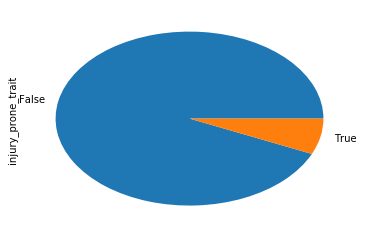

In [1419]:
overrated_players['injury_prone_trait'].value_counts().plot(kind='pie')

## Underrated XI & Overrated XI